<a href="https://colab.research.google.com/github/Shohail786/Optimized_Neural_Network_Planer_data_Classification/blob/main/Optimized_Neural_Network_Planer_data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import math

In [2]:
import pandas as pd

noisy_circles=sklearn.datasets.make_circles(n_samples=200,factor=0.8,noise=.3)
noisy_moons=sklearn.datasets.make_moons(n_samples=200,noise=.2)
X1,Y1=noisy_circles
X1,Y1=X1.T,Y1.reshape(1,Y1.shape[0])
print(X1.shape)
print(Y1.shape)
X2,Y2=noisy_moons
X2,Y2=X2.T,Y2.reshape(1,Y2.shape[0])
print(X2.shape)
print(Y2.shape)



(2, 200)
(1, 200)
(2, 200)
(1, 200)


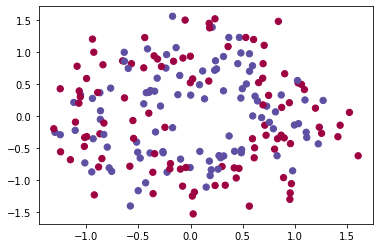

In [3]:
#plot dataset
plt.scatter(X1[0,:],X1[1,:],c=Y1,s=40,cmap=plt.cm.Spectral)



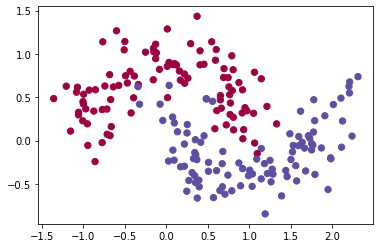

In [4]:
plt.scatter(X2[0,:],X2[1,:],c=Y2,s=40,cmap=plt.cm.Spectral)

In [5]:
m_train=X1.shape[1]
shape_X1=X1.shape
shape_Y1=Y1.shape
print(m_train)
print(X1.shape)
print(Y1.shape)

200
(2, 200)
(1, 200)


In [6]:
def layer_sizes(X1,Y1):
  n_x=X1.shape[0];
  n_y=Y1.shape[0];
  n_h=4;
  return (n_x,n_y,n_h)


In [7]:
def random_mini_batches(X1,Y1,mini_batch_size=64,seed=0):
  np.random.seed(seed)
  m=X1.shape[1]
  permutation=list(np.random.permutation(m))
  mini_batches=[]
  shuffled_X=X1[:,permutation]
  shuffled_Y=Y1[:,permutation]

  num_complete_minibatches=math.floor(m/mini_batch_size)
  for i in range(0,num_complete_minibatches):
    mini_batch_X=shuffled_X[:,(i)*mini_batch_size:(i+1)*mini_batch_size]
    mini_batch_Y=shuffled_Y[:,i*mini_batch_size:(i+1)*mini_batch_size]
    mini_batch=(mini_batch_X,mini_batch_Y)
    mini_batches.append(mini_batch)
  if mini_batch_size!=0:
    mini_batch_X=shuffled_X[:,num_complete_minibatches*mini_batch_size:m]
    mini_batch_Y=shuffled_Y[:,num_complete_minibatches*mini_batch_size:m]
    mini_batch=(mini_batch_X,mini_batch_Y)
    mini_batches.append(mini_batch)
  return mini_batches


In [8]:
def initialize_parameters(layers_dims):
  np.random.seed(3)
  parameters={}
  L=len(layers_dims)
  for l in range(1,L):
    parameters["W"+str(l)]=np.random.randn(layers_dims[l],
      layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
    parameters["b"+str(l)]=np.zeros((layers_dims[l],1))
  
  return parameters

In [9]:
def sigmoid(z):
  a=1/(1+np.exp(-z))
  return a

In [10]:
def relu(Z):
  A=np.maximum(0,Z)
  return A;

In [11]:
def forward_prop(X,parameters):
  W1=parameters["W1"]
  W2=parameters["W2"]
  W3=parameters["W3"]
  b1=parameters["b1"]
  b2=parameters["b2"]
  b3=parameters["b3"]
  Z1=np.dot(W1,X)+b1
  A1=relu(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=relu(Z2)
  Z3=np.dot(W3,A2)+b3
  A3=sigmoid(Z3)
  cache={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2,"Z3":Z3,"A3":A3,"W1":W1,"W2":W2,
         "W3":W3,"b1":b1,"b2":b2,"b3":b3}
  return A3,cache


In [12]:
print(Y1.shape)

(1, 200)


In [13]:
def compute_cost(A3,Y):
  cost=(-1)*np.sum(np.dot(Y,np.log(A3).T)+np.dot(1-Y,np.log(1-A3).T))
  cost=float(np.squeeze(cost))
  return cost

In [14]:
2*np.int64(1>0)

2

In [15]:
def back_prop(X,Y,cache):
  m=Y.shape[1]
  Z1=cache["Z1"]
  Z2=cache["Z2"]
  Z3=cache["Z3"]
  A1=cache["A1"]
  A2=cache["A2"]
  A3=cache["A3"]
  W2=cache["W2"]
  W1=cache["W1"]
  W3=cache["W3"]

  dZ3=(A3-Y)
  dW3=(1/m)*np.dot(dZ3,A2.T)
  db3=(1/m)*np.sum(dZ3,axis=1,keepdims=True)
  dZ2=np.dot(W3.T,dZ3)*np.int64(A2>0)
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*np.int64(A1>0)
  dW1=(1/m)*np.dot(dZ1,X.T)
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
  grads={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2,"db3":db3,"dW3":dW3}
  return grads

In [16]:
def update_parameters_with_gd(parameters,grads,lr):
  L=len(parameters)//2
  for i in range(1,L+1):
    parameters["W"+str(i)]=parameters["W"+str(i)]-lr*grads["dW"+str(i)]
    parameters["b"+str(i)]=parameters["b"+str(i)]-lr*grads["db"+str(i)]
  
  return parameters

In [17]:
def initialize_velocity(parameters):

  L=len(parameters)//2
  v={}
  for i in range(1,L+1):
    v["dW"+str(i)]=np.zeros((parameters["W"+str(i)].shape))
    v["db"+str(i)]=np.zeros((parameters["b"+str(i)].shape))
  return v

In [18]:
#exponential weighted average v_t=v_t*beta+(1-beta)*theta_t,
#adapt slowly with the current changes (1/(1-beta)) gives the number of days of average
def update_parameters_with_momentum(parameters,grads,v,beta,lr):
  L=len(parameters)//2
  for i in range(1,L+1):
      v["dW"+str(i)]=v["dW"+str(i)]*beta+(1-beta)*grads["dW"+str(i)]
      parameters["W"+str(i)]=parameters["W"+str(i)]-lr*v["dW"+str(i)]
      v["db"+str(i)]=beta*v["db"+str(i)]+(1-beta)*grads["db"+str(i)]
      parameters["b"+str(i)]=parameters["b"+str(i)]-lr*v["db"+str(i)]
  return parameters,v

In [19]:
 # rms prop s & momentum =adam (adaptive moment estimation)
def initialize_adam(parameters):
   L=len(parameters)//2
   v={}
   s={}
   for i in range(1,L+1):
     v["dW"+str(i)]=np.zeros((parameters["W"+str(i)].shape))
     v["db"+str(i)]=np.zeros((parameters["b"+str(i)].shape))
     s["dW"+str(i)]=np.zeros((parameters["W"+str(i)].shape))
     s["db"+str(i)]=np.zeros((parameters["b"+str(i)].shape))
   return v,s


In [20]:
def update_parameters_with_adam(parameters,grads,v,s,t,lr=0.01,beta1=0.9,
                                beta2=0.999,epsilon=1e-8):
  L=len(parameters)//2
  v_corrected={}
  s_corrected={}
  for i in range(1,L+1):
    v["dW"+str(i)]=beta1*v["dW"+str(i)]+(1-beta1)*grads["dW"+str(i)]
    v_corrected["dW"+str(i)]=v["dW"+str(i)]/(1-beta1**t)
    v["db"+str(i)]=beta1*v["db"+str(i)]+(1-beta1)*grads["db"+str(i)]
    v_corrected["db"+str(i)]=v["db"+str(i)]/(1-beta1**t)
    s["dW"+str(i)]=beta2*s["dW"+str(i)]+(1-beta2)*(grads["dW"+str(i)]**2)
    s_corrected["dW"+str(i)]=s["dW"+str(i)]/(1-beta2**t)
    s["db"+str(i)]=beta2*s["db"+str(i)]+(1-beta2)*(grads["db"+str(i)]**2)
    s_corrected["db"+str(i)]=s["db"+str(i)]/(1-beta2**t)

    parameters["W"+str(i)]=parameters["W"+str(i)]-lr*(v_corrected["dW"+str(i)]
    /(np.sqrt(s_corrected["dW"+str(i)])+epsilon))
    parameters["b"+str(i)]=parameters["b"+str(i)]-lr*(v_corrected["db"+str(i)]
    /(np.sqrt(s_corrected["db"+str(i)])+epsilon))

  return parameters, v,s,v_corrected,s_corrected

In [51]:
#optimize the learning rate using scheduling
def schedule_lr_decay(learning_rate0,epoch_num,decay_rate,time_interval=1000):
  learning_rate=(1/(1+decay_rate*np.math.floor(epoch_num/time_interval
                )))*learning_rate0
  return learning_rate


In [52]:
def nn_model(X1,Y1,layers_dims,optimizer,learning_rate=0.0007,mini_batch_size=6,
             beta=0.9,beta1=0.9,beta2=0.999,epsilon=1e-8,num_epochs=5000,print_cost=True
             ,decay=None,decay_rate=1):
  
  
  L=len(layers_dims)
  seed=3
  costs=[]
  t=0;
  m=X1.shape[1]
  parameters=initialize_parameters(layers_dims)
  learning_rate0=learning_rate
  # use th different optimizer
  if optimizer=="gd":
    pass #no initialize
  elif optimizer=="momentum":
    v=initialize_velocity(parameters)
  elif optimizer=="adam":
    v,s=initialize_adam(parameters)
  for i in range(num_epochs):
    seed=seed+1
    mini_batches=random_mini_batches(X1,Y1,mini_batch_size,seed)
    cost_total=0;
    for mini_batch in mini_batches:
      (mini_batch_X,mini_batch_Y)=mini_batch
      A3,caches=forward_prop(mini_batch_X,parameters)
      cost_total+=compute_cost(A3,mini_batch_Y)
      grads=back_prop(mini_batch_X,mini_batch_Y,caches)
      if optimizer=="gd":
        parameters=update_parameters_with_gd(parameters,grads,learning_rate)
      elif optimizer=="momentum":
        parameters,v=update_parameters_with_momentum(parameters,grads,v,beta,learning_rate)
      elif optimizer=="adam":
        t=t+1
        parameters,v,s,_,_=update_parameters_with_adam(parameters,grads,v,s,t,learning_rate,
                                               beta1,beta2,epsilon)
    cost_avg=cost_total/m
    if decay:
      learning_rate=decay(learning_rate0,i,decay_rate)
    if print_cost and i%1000==0:
        print("Cost after iteration %i: %f" %(i, cost_avg))
    if print_cost and i%100==0:
        costs.append(cost_avg)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('epochs /100')
  plt.title('learning_rate= '+ str(learning_rate))
  plt.show()
  return parameters

In [53]:
def predict(X1,Y1,parameters):
  A3,cache=forward_prop(X1,parameters)
  m=X1.shape[1]
  p=np.zeros((1,m),dtype=np.int0)
  for i in range(0,A3.shape[1]):
    if(A3[0,i]>0.5):
      p[0,i]=1
    else:
      p[0,i]=0 
  print("Accuracy: "+str(np.mean((p[0,:]==Y1[0,:]))))
 
  return p

In [54]:
def predict_dec(parameters,X1):
  A3,cache=forward_prop(X1,parameters)
  p=(A3>0.5)
  print(A3.shape)
  return p

In [55]:
# decision boundary function
def decision_boundary(model,X,Y):
  #make values like linspace from max to min
  x_min,x_max=X[0,:].min()-1,X[0,:].max()+1
  y_min,y_max=X[1,:].min()-1,X[1,:].max()+1
  # print("X.shape: ",X.shape)
  # print("Y.shape: ",Y.shape)
  # #add some dist between the grid points
  h=0.01
  #create a mesh grid
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  #print("xx.shape: ",xx.shape)
  #print("yy.shape: ",yy.shape)
  #ravel is used to flatten the array from multidimensional
  #np.c_[xx.ravel(),yy.ravel()] results an array with some lines and 2 features
  Z=model(np.c_[xx.ravel(),yy.ravel()])
  var=np.c_[xx.ravel(),yy.ravel()]
  # print("np.c_[].shape",var.shape)
  # print("xx.ravel().shape",xx.ravel().shape)
  # print("yy.ravel().shape",yy.ravel().shape)
  # print("Z.shape: ",Z.shape)
  # #Z should have the same dim as xx and yy.
  Z=Z.reshape(xx.shape)
  #print("Z.shape 2: ",Z.shape)
  #contour and contourf draw contour lines and filled contours, respectively
  #Z is the height for the coordinate xx,yy
  plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  # s- marker size (can be scalar or array of size equal to size of x or y)
  # c- color of sequence of colors for markers
  plt.scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.Spectral)

4
Cost after iteration 0: 0.710440
Cost after iteration 1000: 0.474817
Cost after iteration 2000: 0.435172
Cost after iteration 3000: 0.337213
Cost after iteration 4000: 0.311335


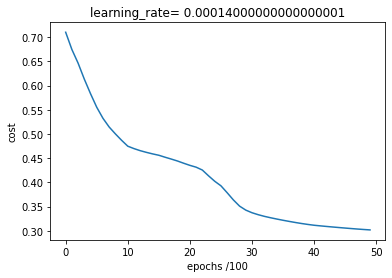

Accuracy: 0.875
(1, 242676)


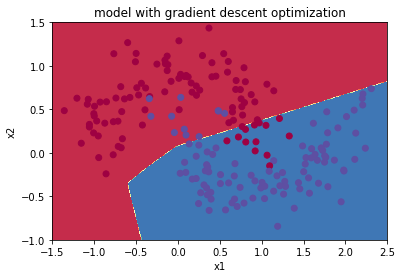

In [56]:
# with gd

layers_dims=[X2.shape[0],5,2,1]
print(len(layers_dims))
parameters = nn_model(X2, Y2,layers_dims,optimizer="gd",decay=schedule_lr_decay)
predictions=predict(X2,Y2,parameters)

plt.title('model with gradient descent optimization')
axes=plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
decision_boundary(lambda x:predict_dec(parameters,x.T),X2,Y2)

4
Cost after iteration 0: 0.710520
Cost after iteration 1000: 0.474901
Cost after iteration 2000: 0.435256
Cost after iteration 3000: 0.337373
Cost after iteration 4000: 0.311412


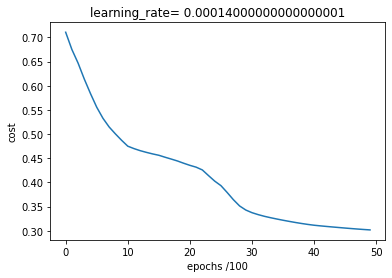

Accuracy: 0.875
(1, 242676)


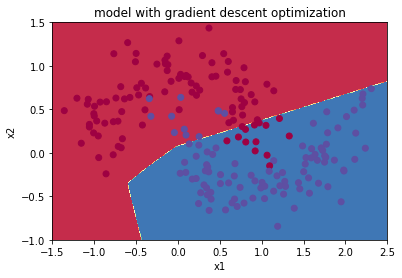

In [57]:
# with momentum

layers_dims=[X2.shape[0],5,2,1]
print(len(layers_dims))
parameters = nn_model(X2, Y2,layers_dims,optimizer="momentum",decay=schedule_lr_decay)
predictions=predict(X2,Y2,parameters)

plt.title('model with gradient descent optimization')
axes=plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
decision_boundary(lambda x:predict_dec(parameters,x.T),X2,Y2)

4
Cost after iteration 0: 0.707805
Cost after iteration 1000: 0.104734
Cost after iteration 2000: 0.097592
Cost after iteration 3000: 0.094956
Cost after iteration 4000: 0.093619


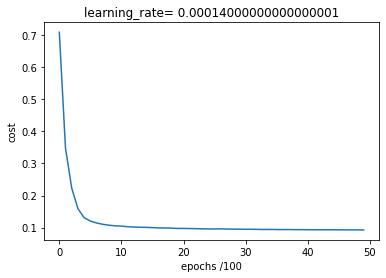

Accuracy: 0.96
(1, 242676)


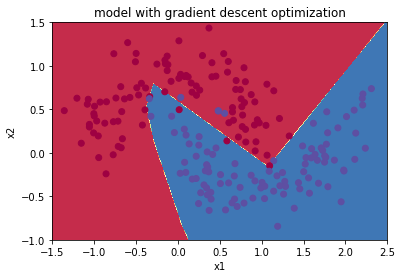

In [66]:
# with adam

layers_dims=[X2.shape[0],5,2,1]
print(len(layers_dims))
parameters_adam = nn_model(X2, Y2,layers_dims,optimizer="adam",decay=schedule_lr_decay)
predictions=predict(X2,Y2,parameters_adam)

plt.title('model with gradient descent optimization')
axes=plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
decision_boundary(lambda x:predict_dec(parameters_adam,x.T),X2,Y2)

In [68]:
#print accuracy
predictions=predict(X1,Y1,parameters_adam)
print("train accuracy: {}%".format(100-np.mean(np.abs(Y1-predictions)*100)))
print ('Accuracy: %d' % float((np.dot(Y1, predictions.T) + np.dot(1 - Y1, 1 - predictions.T)) / float(Y1.size) * 100) + '%')       

Accuracy: 0.505
train accuracy: 50.5%
Accuracy: 50%


Cost after iteration 0: 0.805730
Cost after iteration 1000: 0.606987
Cost after iteration 2000: 0.568155
Cost after iteration 3000: 0.531923
Cost after iteration 4000: 0.509675


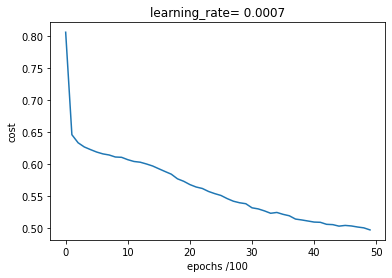

(1, 250428)


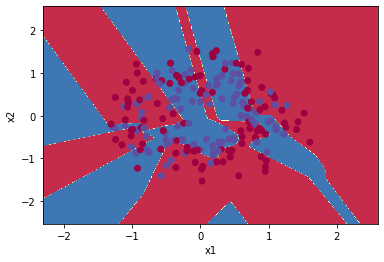

In [72]:
#use the parameters trained on noisy moons to work on noisy moons
#tune the hidden layerss
hd_l_sizes=[X1.shape[0],5,20,1]
plt.title("Hidden layer of size 3")
parameters = nn_model(X1, Y1,hd_l_sizes,optimizer="adam")
decision_boundary(lambda x:predict_dec(parameters,x.T),X1,Y1)


In [73]:
predictions=predict(X1,Y1,parameters)
accuracy=float((np.dot(Y1,predictions.T)+np.dot(1-Y1,1-predictions.T))/float(Y1.size)*100)
print("Accuracy for hidden units: {} %".format(accuracy))

Accuracy: 0.745
Accuracy for hidden units: 74.5 %


In [74]:
clf=sklearn.linear_model.LogisticRegressionCV();
clf.fit(X1.T,Y1.T);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 52 


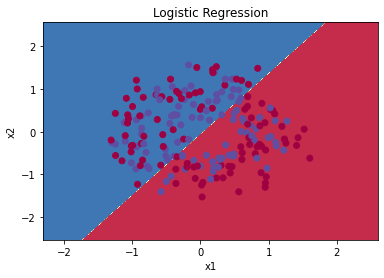

In [75]:
decision_boundary(lambda x: clf.predict(x), X1, Y1)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X1.T)
print ('Accuracy of logistic regression: %d ' 
       % float((np.dot(Y1,LR_predictions) + np.dot(1-Y1,1-LR_predictions))/
               float(Y1.size)*100))
